# Analyzing 911 Call Data in Montgomery County

## Dataset Overview:
The dataset contains approximately 260,000 records of 911 calls made over the past year in Montgomery County. It includes the following attributes:

lat: Latitude

lng: Longitude

desc: Description of the Emergency Call

zip: Zipcode

title: Title (Indicating the reason for the call)

timeStamp: Timestamp (YYYY-MM-DD HH:MM:SS)

twp: Township

addr: Address

e: Dummy variable (always 1)





In [4]:
#Importing the necessary modules for numpy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
import seaborn as sb

In [5]:
# Loading the dataset into a pandas Dataframe
df = pd.read_csv('911.csv')

In [6]:
# Displaying the first 10 records
df.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,10-12-2015 17:10,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,10-12-2015 17:29,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,10-12-2015 14:39,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,10-12-2015 16:47,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,10-12-2015 16:56,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,10-12-2015 15:39,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,10-12-2015 16:46,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,10-12-2015 16:17,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,10-12-2015 16:51,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,10-12-2015 17:35,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


In [7]:
# Printing a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266543 entries, 0 to 266542
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        266543 non-null  float64
 1   lng        266543 non-null  float64
 2   desc       266543 non-null  object 
 3   zip        234049 non-null  float64
 4   title      266543 non-null  object 
 5   timeStamp  266543 non-null  object 
 6   twp        266448 non-null  object 
 7   addr       266543 non-null  object 
 8   e          266543 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 18.3+ MB


In [8]:
# Checking for missing/null values in each column
df.isnull().sum()

lat              0
lng              0
desc             0
zip          32494
title            0
timeStamp        0
twp             95
addr             0
e                0
dtype: int64

In [9]:
# As we can see, we have approximately 32k null values for zip codes and 95 null values for township.
# These values can be ignored because we have 260k records and ignoring/deleting 32k records will not make a major difference.

df_clean = df[pd.notnull(df['zip']) & pd.notnull(df['twp'])] # ignoring zip and twp.
df_clean.isnull().sum()

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64

In [10]:
df_clean.info() # Printing a summary of the cleaned dataset
df_clean.head() # Displaying first 5 records

<class 'pandas.core.frame.DataFrame'>
Index: 234007 entries, 0 to 266542
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        234007 non-null  float64
 1   lng        234007 non-null  float64
 2   desc       234007 non-null  object 
 3   zip        234007 non-null  float64
 4   title      234007 non-null  object 
 5   timeStamp  234007 non-null  object 
 6   twp        234007 non-null  object 
 7   addr       234007 non-null  object 
 8   e          234007 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 17.9+ MB


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,10-12-2015 17:10,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,10-12-2015 17:29,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,10-12-2015 14:39,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,10-12-2015 16:47,NORRISTOWN,AIRY ST & SWEDE ST,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,10-12-2015 15:39,LANSDALE,CANNON AVE & W 9TH ST,1


In [11]:
# Now we have approximately 234k records on which we can perform analysis.

In [57]:
# Converting the timeStamp column to a DateTime object in pandas.
df_clean['timeStamp'] = pd.to_datetime(df_clean['timeStamp'], format='%d-%m-%Y %H:%M')
# Extracting the year, month, day, and time from the timeStamp column into separate columns.
df_clean['Year'] = df_clean['timeStamp'].dt.year
df_clean['Month'] = df_clean['timeStamp'].dt.month.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
df_clean['Day'] = df_clean['timeStamp'].dt.day
df_clean['DayOfWeek'] = df_clean['timeStamp'].dt.dayofweek.map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'})
df_clean['Time'] = df_clean['timeStamp'].dt.time
# Dsiplaying the first 5 records
df_clean.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Month,Day,DayOfWeek,Time
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015,Dec,10,Thu,17:10:00
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,Dec,10,Thu,17:29:00
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:00,NORRISTOWN,HAWS AVE,1,2015,Dec,10,Thu,14:39:00
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:00,NORRISTOWN,AIRY ST & SWEDE ST,1,2015,Dec,10,Thu,16:47:00
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:00,LANSDALE,CANNON AVE & W 9TH ST,1,2015,Dec,10,Thu,15:39:00


In [48]:
# Checking the latitude and longitude column datatype.
df_clean.dtypes

lat                 float64
lng                 float64
desc                 object
zip                 float64
title                object
timeStamp    datetime64[ns]
twp                  object
addr                 object
e                     int64
Year                  int32
Month                 int32
Day                   int32
Time                 object
dtype: object

In [47]:
# Generally, latitudes and longitudes are long decimals and here we have the same case. 
# So, the best data format for them is float64. As we can see above, it is in the float64 format.

In [75]:
# The data ranges from the year 2015 t0 2017, but we only have the data for the month of december in the year 2015
# Also, we don't have the data for the months of novemeber and december in the year 2017.
# So, any analysis that is done using these months as an attribute may not give the right results.

In [79]:
# Analyzing the distribution of 911 calls
df_clean['title'].value_counts().head(5)
# As we can see, the traffic dept. was getting the most calls for vehicle accidents.

title
Traffic: VEHICLE ACCIDENT -    53086
Traffic: DISABLED VEHICLE -    14775
Fire: FIRE ALARM               14203
EMS: RESPIRATORY EMERGENCY     12718
EMS: FALL VICTIM               12625
Name: count, dtype: int64

In [78]:
# But, Let's try one more approach, we can also separate the category and the reason and get the frequency of that separately.
df_clean['Category']=df_clean['title'].apply(lambda val:val.split(':')[0])
df_clean['Reason']=df_clean['title'].apply(lambda val:val.split(':')[1])
df_clean.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Month,Day,DayOfWeek,Time,Category,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015,Dec,10,Thu,17:10:00,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,Dec,10,Thu,17:29:00,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:00,NORRISTOWN,HAWS AVE,1,2015,Dec,10,Thu,14:39:00,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:00,NORRISTOWN,AIRY ST & SWEDE ST,1,2015,Dec,10,Thu,16:47:00,EMS,CARDIAC EMERGENCY
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446,EMS: HEAD INJURY,2015-12-10 15:39:00,LANSDALE,CANNON AVE & W 9TH ST,1,2015,Dec,10,Thu,15:39:00,EMS,HEAD INJURY


In [82]:
df_clean['Category'].value_counts().head(3)
# But, Now we learn that the department getting the most amount of calls was actually the emergency medical services (EMS) dept.
# Not the traffic dept.!!

Category
EMS        121251
Traffic     77771
Fire        34985
Name: count, dtype: int64

In [84]:
df_clean['Reason'].value_counts().head(5)
# Here the reason remains the same, the most calls being made were for vehicle accidents.

Reason
 VEHICLE ACCIDENT -       53086
 DISABLED VEHICLE -       14775
 FIRE ALARM               14250
 RESPIRATORY EMERGENCY    12719
 FALL VICTIM              12629
Name: count, dtype: int64

Text(0.5, 1.0, 'Frequency of Calls Per Month')

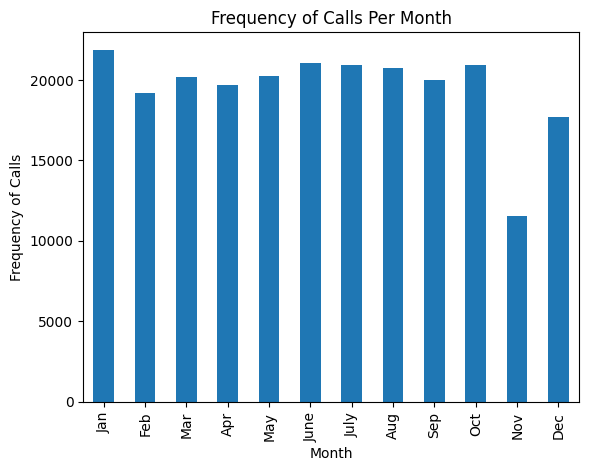

In [85]:
# Visualizing frequency of calls by month
months = ['Jan', 'Feb', 'Mar', 'Apr','May','June', 'July', 'Aug','Sep', 'Oct', 'Nov', 'Dec']
df_clean["Month"].value_counts().reindex(months).plot(kind="bar")
mat.xlabel('Month') 
mat.ylabel('Frequency of Calls') 
mat.title('Frequency of Calls Per Month') 
# As I have explained in task 1, the calls in the month of november are less because we don't have data for november 2017

Text(0.5, 1.0, 'Frequency of Calls Per Year')

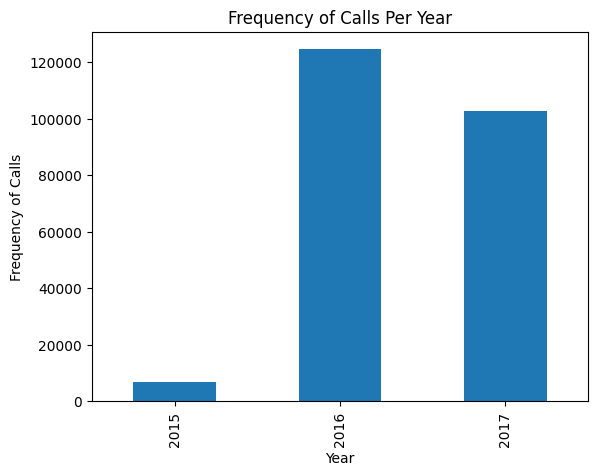

In [86]:
# Visualizing frequency of calls by year
year = [2015, 2016, 2017]
df_clean["Year"].value_counts().reindex(year).plot(kind="bar")
mat.xlabel('Year') 
mat.ylabel('Frequency of Calls') 
mat.title('Frequency of Calls Per Year') 
# calls for the year 2015 are very low because we only have the data for december 2015 and no other months.

In [87]:
# Zipcodes should not have the float datatype as they are not decimals, rather they are positive integers.
# So, we will be converting it from float to integer.
df_clean['zip'] = df_clean['zip'].astype(int)
df_clean.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Month,Day,DayOfWeek,Time,Category,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015,Dec,10,Thu,17:10:00,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,Dec,10,Thu,17:29:00,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:00,NORRISTOWN,HAWS AVE,1,2015,Dec,10,Thu,14:39:00,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:00,NORRISTOWN,AIRY ST & SWEDE ST,1,2015,Dec,10,Thu,16:47:00,EMS,CARDIAC EMERGENCY
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446,EMS: HEAD INJURY,2015-12-10 15:39:00,LANSDALE,CANNON AVE & W 9TH ST,1,2015,Dec,10,Thu,15:39:00,EMS,HEAD INJURY


In [88]:
df_clean['zip'].value_counts().head(5)
# Below are the top 5 zipcodes from which calls were made.

zip
19401    18395
19464    17935
19403    13366
19446    12828
19406     8817
Name: count, dtype: int64

In [89]:
df_clean['twp'].value_counts().head(5)
# Below are the top 5 townships from which calls were made.

twp
LOWER MERION    19442
ABINGTON        15635
NORRISTOWN      14685
POTTSTOWN       10971
CHELTENHAM      10630
Name: count, dtype: int64

Text(0.5, 1.0, 'Frequency of Calls Throughout The Week')

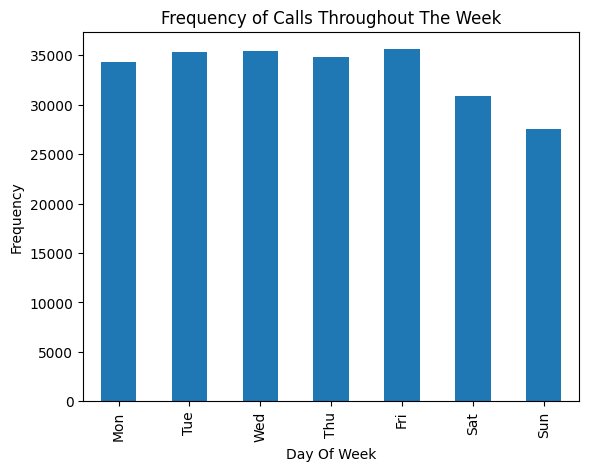

In [90]:
# Visualizing the distribution of calls throughout the week.
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_clean["DayOfWeek"].value_counts().reindex(days).plot(kind="bar")
mat.xlabel('Day Of Week') 
mat.ylabel('Frequency') 
mat.title('Frequency of Calls Throughout The Week') 

In [ ]:
# Frequency of calls in the weekdays seems to be roughly the same.
# But, in the weekends we can see substantial amount of decline in the frequency of calls.
# Sunday, especially, has the lowest amount of calls.

In [98]:
# 1. In order to perform hourly analysis, we should first extract the hour separately from the dataset.
df_clean['Hours'] = df_clean['timeStamp'].dt.hour
df_clean.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Month,Day,DayOfWeek,Time,Category,Reason,Hours
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015,Dec,10,Thu,17:10:00,EMS,BACK PAINS/INJURY,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,Dec,10,Thu,17:29:00,EMS,DIABETIC EMERGENCY,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:00,NORRISTOWN,HAWS AVE,1,2015,Dec,10,Thu,14:39:00,Fire,GAS-ODOR/LEAK,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:00,NORRISTOWN,AIRY ST & SWEDE ST,1,2015,Dec,10,Thu,16:47:00,EMS,CARDIAC EMERGENCY,16
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446,EMS: HEAD INJURY,2015-12-10 15:39:00,LANSDALE,CANNON AVE & W 9TH ST,1,2015,Dec,10,Thu,15:39:00,EMS,HEAD INJURY,15


Text(0.5, 1.0, 'Count of each reason per hour')

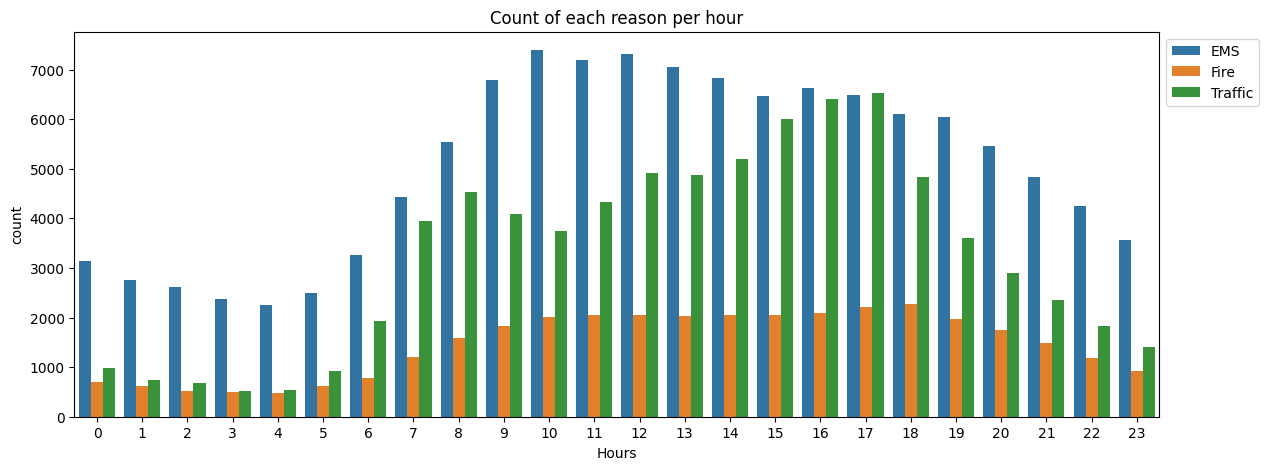

In [99]:
# Frequency of EMS, Fire and Traffic hour wise
fig_dims = (14, 5)
fig = mat.subplots(figsize=fig_dims)
sb.countplot(x='Hours',data=df_clean,hue='Category')
mat.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)
mat.title('Count of each reason per hour')

In [ ]:
# For the most part, majority of calls are made during the day from 07:00 to 21:00.
# The least amount of calls are made from 01:00 to 05:00.

# EMS calls peaks around 10:00 to 12:00 and from 19:00 we can see a steady decline in calls.

# Traffic calls see an increase at 07:00 - 09:00 and at 16:00 - 17:00. 
# This may be due to the fact that people travel due to work and education at those times.

# Fire calls remain roughly the same from 07:00 to 21:00 and decline at midnight. 

In [ ]:
#Key findings
# EMS dept. had the most calls compared to any other departments.
# Fire calls were about have of traffic calls and about 1/5th of EMS calls.
# The top reason for call by a margin of about 35,000 was vehicle accident.
# Weekdays had more 911 calls than weekends.
# Traffic calls were made at times when people travel for work or education.
# Not much can be said with respect to months because we don't have equal amount of data for that.
# And the same goes for year as we don't have equal data about the year 2015.
